In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify

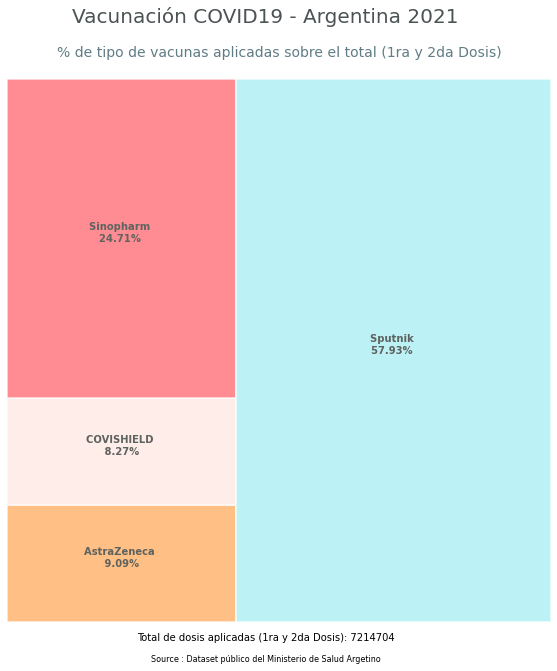

In [66]:
#Url del dataset 
myUrl = 'https://sisa.msal.gov.ar/datos/descargas/covid-19/files/datos_nomivac_covid19.zip'
#filename="C:/Users/lbejaran/Documents/PYTHON DS/covid_test.csv"
#leemos el dataset
#usecols=["grupo_etario","orden_dosis","vacuna"]
data = pd.read_csv(myUrl,usecols=["orden_dosis","vacuna"])
#Agrupamos el dataset por grupo etario y la dosis, se cuenta la aplicacion de las dosis por la columna vacuna

df = data.groupby(["vacuna"], as_index=False).count()

total_vac = df.orden_dosis.sum()

colors = ["#FFB067","#FFE9E4","#FF7077","#ACEEF3"]
#labels = ["%s\n%.2f" % (label) for label in zip(df.vacuna, df.orden_dosis)]
#labels = [str('{:5.2f}'.format(i/df['orden_dosis'].sum()*100)) + "%" for i in df['orden_dosis']]
#label=df['vacuna']

perc = [f'{i/df["orden_dosis"].sum()*100:5.2f}%' for i in df['orden_dosis']]
#labels = [f'{el[0]} : {el[1]}' for el in zip(df['vacuna'], perc)]

labels = ["%s \n%s \n" % (label) for label in zip(df.vacuna, perc)]

fig = plt.figure(figsize=(15, 10))
fig.suptitle("Vacunación COVID19 - Argentina 2021", fontsize=20, color="#4C5355")
ax = fig.add_subplot(111, aspect="equal")

ax = squarify.plot(sizes=df['orden_dosis'], bar_kwargs=dict(linewidth=1.5, edgecolor="w"),color=colors,label=labels, alpha=.8, text_kwargs={'fontsize':10, 'fontweight':'bold','color':'#5F635F','wrap':True} )

ax.set_xticks([])
ax.set_yticks([])
ax.set_title("% de tipo de vacunas aplicadas sobre el total (1ra y 2da Dosis)\n", fontsize=14, color="#607D86")

fig.text(.5, 0.1,
         "Total de dosis aplicadas (1ra y 2da Dosis): %d" % (total_vac),
         fontsize=10,
         ha="center")
fig.text(.5, 0.07,
         "Source : Dataset público del Ministerio de Salud Argetino",
         fontsize=8,
         ha="center")

plt.axis('off')
plt.show() 